# Preparing Dataset

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [6]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [7]:
y = y.reshape(len(y),1) # Transforming y into a 2D array for feature scaling

In [8]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [9]:
# SVR does not have equations like Linear Regression so we have to do Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [10]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [11]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training SVR Model for Dataset

In [13]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X, y)

SVR()

# Predicting a new result

In [14]:
regressor.predict([[6.5]]) # We have to reverse feature scaling for X value in a way that regressor can understand.

array([0.01158103])

In [15]:
regressor.predict(sc_X.transform([[6.5]])) # Now we get the feature scaled result of y

array([-0.27861589])

In [16]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]]))) # Now we reverse the of result also, because result was feature scaled value of y

array([170370.0204065])

In [18]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[10]])))

array([557821.75899897])

# Visualizing SVR results

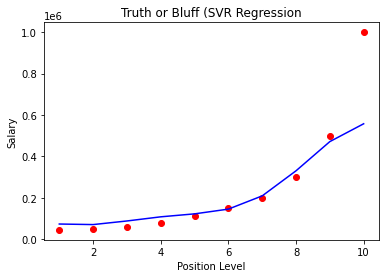

In [17]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red') # Converting X and y to original scales, i.e, like they were before feature scaling.

plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title("Truth or Bluff (SVR Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()